# Crawling with `advertools`

In [ ]:
import advertools as adv
import adviz
import pandas as pd
import plotly.express as px
pd.options.display.max_columns = None
for pkg in [adv, adviz, pd]:
    print(f'{pkg.__name__:-<20}v{pkg.__version__}')

advertools----------v0.13.5
adviz---------------v0.0.13
pandas--------------v2.1.0rc0


## Basic (list mode), one URL and an `output_file`

In [ ]:
adv.crawl(url_list='https://example.com', output_file='example.jl')

In [ ]:
example = pd.read_json('example.jl', lines=True)
example

,url,title,viewport,charset,h1,body_text,size,download_timeout,download_slot,download_latency,depth,status,links_url,links_text,links_nofollow,ip_address,crawl_time,resp_headers_content-length,resp_headers_accept-ranges,resp_headers_age,resp_headers_cache-control,resp_headers_content-type,resp_headers_date,resp_headers_etag,resp_headers_expires,resp_headers_last-modified,resp_headers_server,resp_headers_vary,resp_headers_x-cache,request_headers_accept,request_headers_accept-language,request_headers_user-agent,request_headers_accept-encoding
0,https://example.com,Example Domain,"width=device-width, initial-scale=1",utf-8,Example Domain,This domain is for use in illustrative example...,1256,180,example.com,0.171685,0,200,https://www.iana.org/domains/example,More information...,False,93.184.216.34,2023-08-23 21:19:59,648,bytes,493735,max-age=604800,text/html; charset=UTF-8,"Wed, 23 Aug 2023 21:19:59 GMT","""3147526947+gzip""","Wed, 30 Aug 2023 21:19:59 GMT","Thu, 17 Oct 2019 07:18:26 GMT",ECS (dcb/7EA3),Accept-Encoding,HIT,"text/html,application/xhtml+xml,application/xm...",en,advertools/0.13.5,"gzip, deflate"


In [ ]:
example.to_csv('example.csv', index=False)

## Basic (spider mode), only need to add `follow_links=True`

* Follows links in the domain(s) available in `url_list`
* Follows links in all their sub-domains if available
* Optionally set `allowed_domains` for further restriction/expansion

In [ ]:
adv.crawl(
    url_list='https://www.datavisualizationsociety.org/',
    output_file='dvs.jl',
    follow_links=True)

In [ ]:
dvs = pd.read_json('dvs.jl', lines=True)
print(dvs.shape)
dvs.head()

(467, 101)


,url,title,viewport,charset,h1,h2,h3,canonical,og:site_name,og:title,og:url,og:type,og:image,og:image:width,og:image:height,twitter:title,twitter:image,twitter:url,twitter:card,jsonld_url,jsonld_name,jsonld_description,jsonld_image,jsonld_@context,jsonld_@type,jsonld_1_address,jsonld_1_image,jsonld_1_openingHours,jsonld_1_@context,jsonld_1_@type,body_text,size,download_timeout,download_slot,download_latency,depth,status,links_url,links_text,links_nofollow,nav_links_url,nav_links_text,nav_links_nofollow,header_links_url,header_links_text,header_links_nofollow,footer_links_url,footer_links_text,footer_links_nofollow,img_src,img_alt,img_width,img_height,img_sizes,img_srcset,img_loading,img_decoding,ip_address,crawl_time,resp_headers_content-length,resp_headers_accept-ranges,resp_headers_age,resp_headers_content-type,resp_headers_date,resp_headers_etag,resp_headers_expires,resp_headers_server,resp_headers_strict-transport-security,resp_headers_vary,resp_headers_x-content-type-options,resp_headers_x-contextid,request_headers_accept,request_headers_accept-language,request_headers_user-agent,request_headers_accept-encoding,request_headers_cookie,request_headers_referer,meta_desc,og:description,twitter:description,alt_href,og:latitude,og:longitude,og:locality,jsonld_2_name,jsonld_2_url,jsonld_2_datePublished,jsonld_2_dateModified,jsonld_2_headline,jsonld_2_author,jsonld_2_image,jsonld_2_@context,jsonld_2_@type,jsonld_2_publisher.name,jsonld_2_publisher.logo.@type,jsonld_2_publisher.logo.url,jsonld_2_publisher.@context,jsonld_2_publisher.@type,retry_times,resp_headers_cache-control,resp_headers_pragma
0,https://www.datavisualizationsociety.org/,Data Visualization Society,"width=device-width, initial-scale=1",utf-8,@@Where Data Visualization Practitioners and E...,"Week of August 21, 2023",New to Read@@Join the Conversation@@this week@...,https://www.datavisualizationsociety.org,Data Visualization Society,Data Visualization Society,https://www.datavisualizationsociety.org,website,http://static1.squarespace.com/static/5c6055b5...,1200.0,630.0,Data Visualization Society,http://static1.squarespace.com/static/5c6055b5...,https://www.datavisualizationsociety.org,summary,https://www.datavisualizationsociety.org,Data Visualization Society,,//images.squarespace-cdn.com/content/v1/5c6055...,http://schema.org,WebSite,,https://static1.squarespace.com/static/5c6055b...,", , , , , ,",http://schema.org,LocalBusiness,DVS is a volunteer-run 501c3 nonprofit with th...,91096,180,www.datavisualizationsociety.org,0.099866,0,200,https://www.datavisualizationsociety.org/@@htt...,@@\n home\n @@\n ...,False@@False@@False@@False@@False@@False@@Fals...,https://www.datavisualizationsociety.org/@@htt...,\n home\n @@\n ...,False@@False@@False@@False@@False@@False@@Fals...,https://www.datavisualizationsociety.org/@@htt...,@@\n home\n @@\n ...,False@@False@@False@@False@@False@@False@@Fals...,https://www.datavisualizationsociety.org/#head...,Back to Top@@Code of Conduct@@Privacy Policy@@...,False@@False@@False@@False@@False@@False@@Fals...,//images.squarespace-cdn.com/content/v1/5c6055...,Data Visualization Society@@Become a DVS membe...,@@@@@@@@@@2000@@1080@@1080@@1080@@2000@@2000,@@@@@@@@@@300@@1080@@1080@@1080@@780@@780,@@@@@@@@@@100vw@@100vw@@100vw@@100vw@@100vw@@1...,@@@@@@@@@@https://images.squarespace-cdn.com/c...,@@@@@@@@@@lazy@@lazy@@lazy@@lazy@@lazy@@lazy,@@@@@@@@@@async@@async@@async@@async@@async@@a...,198.185.159.144,2023-08-23 21:21:21,17824.0,bytes,887,text/html;charset=utf-8,"Wed, 23 Aug 2023 20:15:34 GMT","W/""ae4170b9935776052a6a3cbf3462357b""","Thu, 01 Jan 1970 00:00:00 GMT",Squarespace,max-age=0,Accept-Encoding,nosniff,FBDztqhz/iyCQX1qI,"text/html,application/xhtml+xml,application/xm...",en,advertools/0.13.5,"gzip, deflate",crumb=BbG7Zw7GMYgcNjVmNzNkZDdkNGZlMzFlYWJjNTJi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.datavisualizationsociety.org/membe...,Membership — Data Visuali

In [ ]:
dvs['h1']

0                 @@Where Data Visualization Practitioners and Enthusiasts Connect. 
1                                                                                NaN
2                                                                                NaN
3                                                                                NaN
4                                                                  @@Slack Community
                                           ...                                      
462                                                            429 Too Many Requests
463                                                            429 Too Many Requests
464                                                            429 Too Many Requests
465    @@\n      \n        Who Do We Create Data Visualizations For?\n      \n      
466                                                            429 Too Many Requests
Name: h1, Length: 467, dtype: object

## Too Many Requests! 

## Enable auto-throttling

In [ ]:
adv.crawl(
    url_list='https://www.datavisualizationsociety.org/',
    output_file='dvs_throttle.jl',
    follow_links=True,
    custom_settings={

        'AUTOTHROTTLE_ENABLED': True,
        'AUTOTHROTTLE_TARGET_CONCURRENCY': 1,
        'DOWNLOAD_DELAY': 2,

        'LOG_FILE': 'dvs_throttle.log',
    })

In [ ]:
dvs_throttle = pd.read_json('dvs_throttle.jl', lines=True)
dvs_throttle['status'].value_counts()

status
200    466
404      2
Name: count, dtype: int64

In [ ]:
dvs['status'].value_counts()

status
200    412
429     53
404      2
Name: count, dtype: int64

## How many text elements* do I have per page?

\*text elements: Non-numeric columns, title, h1, h2, meta_desc, etc.

In [ ]:
dvs_throttle['title'].str.split('@@').str.len().value_counts(dropna=False).sort_index().to_frame()

,count
title,
1,468


In [ ]:
dvs_throttle['meta_desc'].str.split('@@').str.len().value_counts(dropna=False).sort_index().to_frame()

,count
meta_desc,
1.0,138
NaN,330


In [ ]:
dvs_throttle['h1'].str.split('@@').str.len().value_counts(dropna=False).sort_index().to_frame()

,count
h1,
2.0,312
3.0,20
4.0,19
5.0,5
6.0,1
7.0,7
9.0,6
10.0,4
11.0,7


In [ ]:
dvs_throttle.filter(regex='jsonld').notna().mean().to_frame().style.format('{:.1%}').bar()

,0
jsonld_url,100.0%
jsonld_name,100.0%
jsonld_description,100.0%
jsonld_image,100.0%
jsonld_@context,100.0%
jsonld_@type,100.0%
jsonld_1_address,100.0%
jsonld_1_image,100.0%
jsonld_1_openingHours,100.0%
jsonld_1_@context,100.0%


In [ ]:
dvs_throttle.filter(regex='og:').notna().mean().to_frame().style.format('{:.1%}').bar()

,0
og:site_name,100.0%
og:title,100.0%
og:url,99.6%
og:type,100.0%
og:image,100.0%
og:image:width,99.6%
og:image:height,99.6%
og:description,40.6%
og:latitude,35.5%
og:longitude,35.5%


In [ ]:
dvs_throttle.select_dtypes('number')

,og:image:width,og:image:height,size,download_timeout,download_latency,depth,status,resp_headers_content-length,resp_headers_age,og:latitude,og:longitude
0,1200.0,630.0,92144,180,0.135910,0,200,17934.0,15003,NaN,NaN
1,1500.0,1543.0,71218,180,0.110083,1,200,16273.0,40365,NaN,NaN
2,1500.0,1543.0,74996,180,0.402749,1,200,15795.0,0,NaN,NaN
3,1500.0,829.0,61333,180,0.112190,1,200,14381.0,497,NaN,NaN
4,1500.0,1543.0,74854,180,0.142474,1,200,15652.0,14947,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
463,1500.0,1543.0,65129,180,0.419687,1,200,15042.0,0,NaN,NaN
464,1500.0,1543.0,72874,180,0.136353,1,200,17542.0,1396,NaN,NaN
465,1500.0,1131.0,204192,180,0.264180,1,200,27661.0,0,NaN,NaN
466,1500.0,1543.0,63912,180,0.204184,1,200,14893.0,0,NaN,NaN


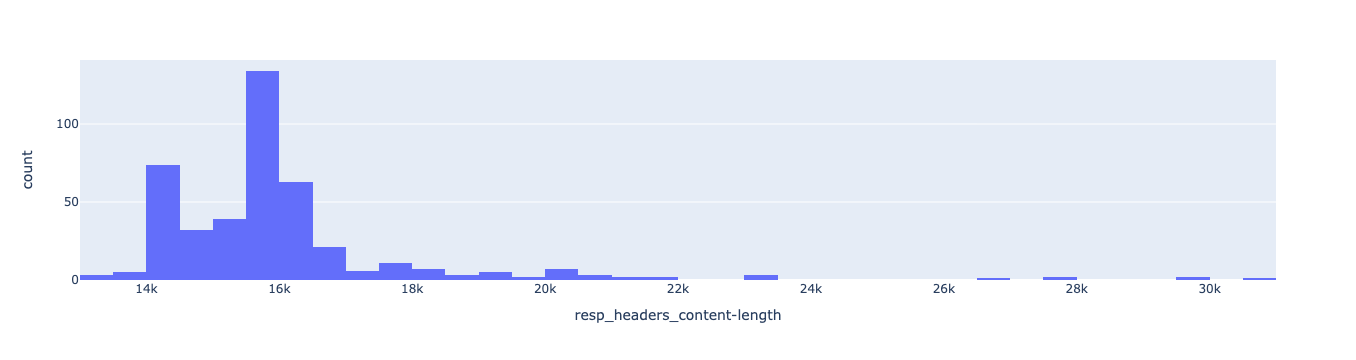

In [ ]:
px.histogram(dvs_throttle, x='resp_headers_content-length', width=1000)

## Crawl `nytimes.com`

* Get only articles from August 2023
* Don't follow links in the Spanish, Canadian, or Chinese versions

In [ ]:
adv.crawl(
    url_list=['https://www.nytimes.com/'],
    output_file='nyt_august.jl',
    follow_links=True,

    include_url_regex='/2023/08/',

    exclude_url_regex='com/ca/|cn\.nytimes|com/es/',
)

In [ ]:
nyt = pd.read_json('nyt_august.jl', lines=True)

In [ ]:
nyt_urldf = adv.url_to_df(nyt['url'])
nyt_urldf.head(3)

,url,scheme,netloc,path,query,fragment,dir_1,dir_2,dir_3,dir_4,dir_5,dir_6,dir_7,dir_8,dir_9,last_dir,query_action,query_pgtype,query_region,query_block,query_variant,query_module,query_state,query_name
0,https://www.nytimes.com/,https,www.nytimes.com,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.nytimes.com/2023/08/23/t-magazine/jay-alison-carroll-wonder-valley-maine-feast.html,https,www.nytimes.com,/2023/08/23/t-magazine/jay-alison-carroll-wonder-valley-maine-feast.html,NaN,NaN,2023,08,23,t-magazine,jay-alison-carroll-wonder-valley-maine-feast.html,NaN,NaN,NaN,NaN,jay-alison-carroll-wonder-valley-maine-feast.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.nytimes.com/2023/08/24/us/shooting-cooks-corner-bar-orange-county.html,https,www.nytimes.com,/2023/08/24/us/shooting-cooks-corner-bar-orange-county.html,NaN,NaN,2023,08,24,us,shooting-cooks-corner-bar-orange-county.html,NaN,NaN,NaN,NaN,shooting-cooks-corner-bar-orange-county.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nyt_urldf[['dir_1', 'dir_2', 'dir_3']].value_counts().reset_index().head()

,dir_1,dir_2,dir_3,count
0,interactive,2023,08,34
1,2023,08,23,33
2,live,2023,08,32
3,2023,08,01,18
4,2023,08,22,14


In [ ]:
nyt['pub_date'] = pd.to_datetime(nyt_urldf['path'].str.extract('/(2023/08/\d\d)/')[0])

In [ ]:
nyt['pub_date'].dropna().dt.day.value_counts().sort_index().to_frame().style.bar(color='steelblue')

,count
pub_date,
1,26
2,12
3,10
4,12
5,6
6,1
7,11
8,9
9,15


In [ ]:
nyt[['url', 'title', 'pub_date']].head()

,url,title,pub_date
0,https://www.nytimes.com/,"The New York Times - Breaking News, US News, World News and Videos",NaT
1,https://www.nytimes.com/2023/08/23/t-magazine/jay-alison-carroll-wonder-valley-maine-feast.html,First They Appeased Poseidon. Then They Ate Lobster. - The New York Times,2023-08-23
2,https://www.nytimes.com/2023/08/24/us/shooting-cooks-corner-bar-orange-county.html,"4 Dead in Shooting at Cook’s Corner Bar in Orange County, California - The New York Times",2023-08-24
3,https://www.nytimes.com/2023/08/24/world/asia/australia-malka-leifer-sentence.html,Ex-Principal of Australian Girls School Sentenced to 15 Years for Abuse - The New York Times,2023-08-24
4,https://www.nytimes.com/2023/08/23/travel/australian-outback-aboriginal-people-wildlife.html,"In the Heart of the Australian Outback, Safeguarding a Sacred Land - The New York Times",2023-08-23


## Using URL patterns to get certain types/categories of products

In [ ]:
adv.crawl(
    url_list='https://www.burga.com/collections/drinkware',
    output_file='burga.jl',
    follow_links=True,
    include_url_regex='bottle|cup|mug',
    custom_settings={
        'AUTOTHROTTLE_ENABLED': True,
        'AUTOTHROTTLE_TARGET_CONCURRENCY': 4,
        'LOG_FILE': 'burga.log',
    })

In [ ]:
burga = pd.read_json('burga.jl', lines=True)

In [ ]:
burga.head()

,url,title,meta_desc,viewport,charset,h1,h2,h3,canonical,alt_href,og:type,og:title,og:price:amount,og:price:currency,og:description,og:url,og:site_name,og:image,og:image:secure_url,og:image:width,og:image:height,twitter:card,twitter:title,twitter:description,twitter:image,twitter:image:width,twitter:image:height,jsonld_@context,jsonld_@type,jsonld_@id,jsonld_name,jsonld_url,jsonld_description,jsonld_image,jsonld_mainEntity.@type,jsonld_mainEntity.itemListElement,body_text,size,download_timeout,download_slot,download_latency,depth,status,links_url,links_text,links_nofollow,nav_links_url,nav_links_text,nav_links_nofollow,header_links_url,header_links_text,header_links_nofollow,footer_links_url,footer_links_text,footer_links_nofollow,img_width,img_height,img_src,img_alt,img_srcset,img_loading,ip_address,crawl_time,resp_headers_date,resp_headers_content-type,resp_headers_x-sorting-hat-podid,resp_headers_x-sorting-hat-shopid,resp_headers_x-storefront-renderer-rendered,resp_headers_set-cookie,resp_headers_etag,resp_headers_link,resp_headers_x-shopify-granular-consent-beta,resp_headers_x-cache,resp_headers_content-security-policy,resp_headers_strict-transport-security,resp_headers_x-shopid,resp_headers_x-shardid,resp_headers_vary,resp_headers_content-language,resp_headers_powered-by,resp_headers_server-timing,resp_headers_x-shopify-stage,resp_headers_x-dc,resp_headers_x-request-id,resp_headers_x-xss-protection,resp_headers_x-download-options,resp_headers_x-content-type-options,resp_headers_x-permitted-cross-domain-policies,resp_headers_cf-cache-status,resp_headers_report-to,resp_headers_nel,resp_headers_server,resp_headers_cf-ray,resp_headers_alt-svc,request_headers_accept,request_headers_accept-language,request_headers_user-agent,request_headers_accept-encoding,og:image_1,og:image:secure_url_1,og:image_2,og:image:secure_url_2,jsonld_sku,jsonld_mpn,jsonld_offers,jsonld_brand.@type,jsonld_brand.name,jsonld_aggregateRating.@type,jsonld_aggregateRating.ratingValue,jsonld_aggregateRating.ratingCount,resp_headers_access-control-allow-origin,request_headers_referer,request_headers_cookie
0,https://www.burga.com/collections/drinkware,\n Drinkware | BURGA\n@@American Express@@Apple Pay@@Mastercard@@PayPal@@Visa,We know that looking fabulous while staying hydrated and looking out for the environment at the same time isn’t easy...,"width=device-width, initial-scale=1, maximum-scale=1@@width=device-width,initial-scale=1",utf-8,Sip in Style@@,Your cart@@Your Cart is Empty@@SELECT MODEL@@Sort by,Collections@@Almond Latte @@Dark Mode @@Almond Latte @@Dark Mode @@Double Pink @@Tan @@Pure Black @@Double Pink @@Bl...,https://www.burga.com/collections/drinkware,/collections/drinkware.atom@@https://www.burga.com/collections/drinkware.oembed,product,,,USD,We know that looking fabulous while staying hydrated and looking out for the environment at the same time isn’t easy...,https://www.burga.com/collections/drinkware,BURGA,https://cdn.shopify.com/s/files/1/2100/2577/files/burga.jpg?v=1588179695,https://cdn.shopify.com/s/files/1/2100/2577/files/burga.jpg?v=1588179695,1200.0,628.0,summary,,,https://www.burga.com/cdn/shopifycloud/shopify/assets/no-image-2048-5e88c1b20e087fb7bbe9a3771824e743c244f437e4f8ba93...,240.0,240.0,http://schema.org,CollectionPage,https://www.burga.com/collections/drinkware,Sip in Style,https://www.burga.com/collections/drinkware,We know that looking fabulous while staying hydrated and looking out for the environment at the same time isn’t easy...,https://www.burga.com/cdn/shop/products/WATER-BOTTLE-IAA_e6f0ba22-0c33-40fd-9e8a-6bc22c95408a.jpg?v=1626253032&width...,ItemList,"[{'@type': 'ListItem', 'position': 1, 'item': {'@id': 'https://www.burga.com/collections/drinkware/products/cute-wat...",You are currently shopping in Select a different store: Select... \n Global / USD\n \n ...,950952,180,www.burga.com,0.652598,0,200,https://www.burga.com/@@https://www.burga.com/account@@https://www.burga.com/collections/all@@https://www.burga.co

## Custom extraction, depth limit, and URL regex

In [ ]:
genre_selector = '//span[contains(text(), "Genres")]/following-sibling::span/text()'

adv.crawl(
    url_list='https://www.boxofficemojo.com/chart/top_lifetime_gross/',
    output_file='movies_genres.jl',
    follow_links=True,

    include_url_regex='/title/',

    xpath_selectors={
        'genre': genre_selector,
    },

    custom_settings={
        'DEPTH_LIMIT': 1,
        'LOG_FILE': 'movies_genres.log'
    })

In [ ]:
movies = pd.read_json('movies_genres.jl', lines=True)

In [ ]:
movies['genre'].str.split()

0                                                  NaN
1                  [Action, Adventure, Drama, Fantasy]
2      [Action, Adventure, Animation, Fantasy, Sci-Fi]
3                  [Action, Adventure, Comedy, Sci-Fi]
4                  [Action, Adventure, Comedy, Sci-Fi]
                            ...                       
196                        [Action, Adventure, Sci-Fi]
197               [Action, Adventure, Fantasy, Sci-Fi]
198                 [Action, Adventure, Drama, Sci-Fi]
199                        [Action, Adventure, Sci-Fi]
200               [Action, Adventure, Fantasy, Sci-Fi]
Name: genre, Length: 201, dtype: object

In [ ]:
movies['title'].str.replace(' - Box Office Mojo', '')

0                               Top Lifetime Grosses
1      The Lord of the Rings: The Return of the King
2                Spider-Man: Across the Spider-Verse
3                          Spider-Man: Far from Home
4                     Guardians of the Galaxy Vol. 2
                           ...                      
196                                   Jurassic World
197                          Spider-Man: No Way Home
198                                Avengers: Endgame
199       Star Wars: Episode VII - The Force Awakens
200                                           Avatar
Name: title, Length: 201, dtype: object

In [ ]:
adv.crawl_images(
    start_urls=movies['url'][1:],
    output_dir='movie_images',
    min_height=20,
    min_width=20)

In [ ]:
adv.summarize_crawled_imgs('movie_images')

,image_location,image_urls
0,https://www.boxofficemojo.com/title/tt0167260/,https://fls-na.amazon.com/1/batch/1/OP/A3TEC2XMDTZJRD:133-1272396-0606936:8HSHDTHTJS3QD9J6XSA6$uedata=s:%2Fuedata%2F...
0,https://www.boxofficemojo.com/title/tt0167260/,https://m.media-amazon.com/images/G/01/IMDbPro/images/dropbox/MI_NB_011321_NYNY2021_mojo.png
0,https://www.boxofficemojo.com/title/tt0167260/,https://m.media-amazon.com/images/M/MV5BNzA5ZDNlZWMtM2NhNS00NDJjLTk4NDItYTRmY2EwMWZlMTY3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@...
0,https://www.boxofficemojo.com/title/tt0167260/,https://m.media-amazon.com/images/G/01/boxofficemojo/ic_summary_m._CB485936930_.png
0,https://www.boxofficemojo.com/title/tt0167260/,https://fls-na.amazon.com/1/batch/1/OP/A3TEC2XMDTZJRD:133-1272396-0606936:8HSHDTHTJS3QD9J6XSA6$uedata=s:%2Fuedata%2F...
...,...,...
199,https://www.boxofficemojo.com/title/tt0499549/,https://fls-na.amazon.com/1/batch/1/OP/A3TEC2XMDTZJRD:133-1272396-0606936:KC1NQZ0A0NZMCFGTDG43$uedata=s:%2Fuedata%2F...
199,https://www.boxofficemojo.com/title/tt0499549/,https://m.media-amazon.com/images/G/01/IMDbPro/images/dropbox/MI_NB_011321_NYNY2021_mojo.png
199,https://www.boxofficemojo.com/title/tt0499549/,https://m.media-amazon.com/images/M/MV5BZDA0OGQxNTItMDZkMC00N2UyLTg3MzMtYTJmNjg3Nzk5MzRiXkEyXkFqcGdeQXVyMjUzOTY1NTc@...
199,https://www.boxofficemojo.com/title/tt0499549/,https://m.media-amazon.com/images/G/01/boxofficemojo/ic_summary_m._CB485936930_.png


## Analyzing internal links

In [ ]:
dvs_throttle[['url', 'links_url']].head(3)

,url,links_url
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/@@https://www.datavisualizationsociety.org/@@https://www.datavisualizations...
1,https://www.datavisualizationsociety.org/membership,https://www.datavisualizationsociety.org/membership@@https://www.datavisualizationsociety.org/@@https://www.datavisu...
2,https://www.datavisualizationsociety.org/affiliated-groups,https://www.datavisualizationsociety.org/affiliated-groups@@https://www.datavisualizationsociety.org/@@https://www.d...


In [ ]:
pd.DataFrame({
    'source': dvs_throttle['url'],
    'destination': dvs_throttle['links_url'].str.split('@@')
}).explode('destination')

,source,destination
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/mission
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/board-council
0,https://www.datavisualizationsociety.org/,https://www.datavisualizationsociety.org/committees
...,...,...
467,https://www.datavisualizationsociety.org/join,https://www.linkedin.com/company/data-visualization-society/
467,https://www.datavisualizationsociety.org/join,https://www.youtube.com/channel/UCDvDHr5CYKBrbwaqRs04LPw
467,https://www.datavisualizationsociety.org/join,https://teespring.com/stores/data-visualization-society
467,https://www.datavisualizationsociety.org/join,https://www.datavisualizationsociety.org/brand-guidelines


## Resuming/restarting the same crawl job using the `JOBDIR` custom setting

In [ ]:
!wc nyt_crawl.jl

     305 1237428 26799238 nyt_crawl.jl


In [ ]:
!wc nyt_crawl.jl

     613 2416821 54323986 nyt_crawl.jl


Run this code twice, it should do the same crawl but avoid crawling URLs that were already seen/crawled.

In [ ]:
adv.crawl(
    'https://nytimes.com',
    'nyt_crawl.jl',
    follow_links=True,
    custom_settings={

        'JOBDIR': 'nyt_crawl_job',

        'CLOSESPIDER_PAGECOUNT': 300,
        'LOG_FILE': 'nyt_crawl.log'
    })

In [ ]:
nyt_crawl = pd.read_json('nyt_crawl.jl', lines=True)

## Verify that it worked by checking if there are duplicated URLs

In [ ]:
nyt_crawl['url'].duplicated().sum()

0